In [1]:
#Importing Different Packages


import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading the Churn Data
---

In [2]:
df=pd.read_csv('data/churn.csv')

Listing all the columns and info
---

In [3]:
df.columns

Index([u'State', u'Account Length', u'Area Code', u'Phone', u'Int'l Plan',
       u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls',
       u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins',
       u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls',
       u'Intl Charge', u'CustServ Calls', u'Churn?'],
      dtype='object')

In [4]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 572.9+ KB


In [ ]:
#There are 2 type of data types in columns one is Categorical and other is Numeric.
#Making a separate list for both the types

In [6]:
numeric_columns = ["Account Length", "VMail Message", "Day Mins",
                "Day Calls", "Day Charge", "Eve Mins",
                "Eve Calls", "Eve Charge", "Night Mins",
                "Night Calls", "Intl Mins", "Intl Calls",
                "Intl Charge"]

categorical_columns = ["State", "Int'l Plan", "VMail Plan", "Area Code"]

In [7]:
df[numeric_columns]

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Intl Mins,Intl Calls,Intl Charge
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,10.0,3,2.70
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,13.7,3,3.70
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,12.2,5,3.29
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,6.6,7,1.78
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,10.1,3,2.73
5,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,6.3,6,1.70
6,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,7.5,7,2.03
7,147,0,157.0,79,26.69,103.1,94,8.76,211.8,96,7.1,6,1.92
8,117,0,184.5,97,31.37,351.6,80,29.89,215.8,90,8.7,4,2.35
9,141,37,258.6,84,43.96,222.0,111,18.87,326.4,97,11.2,5,3.02


Data Exploration
---

In [ ]:
#Counting the Churn and plotting it.

In [8]:
churn_count=pd.value_counts(df['Churn?'])

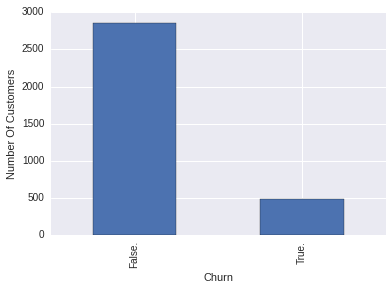

In [9]:
churn_count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Number Of Customers')
#plt.show()

There is a clear class imbalance in this. Churned customer is around 500 while the not churned is around 2800.
---

In [28]:
#Plotting a curve to see the number of customer care call distribution.

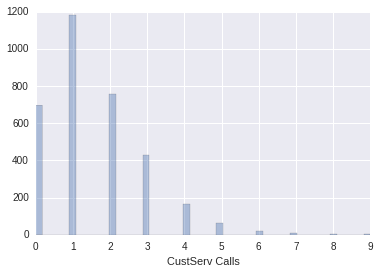

In [10]:
sns.distplot(df['CustServ Calls'],kde=False)
#plt.show()

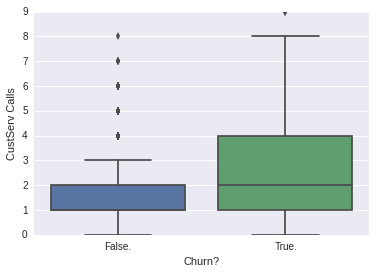

In [11]:
sns.boxplot(x='Churn?',y='CustServ Calls',data=df)
#plt.show()

In [13]:
#The boxplot shows that the median number of customer service call where customer churn is 2.
#There are some outliers also where customers have made more than 4 calls but has not churned.

Pairplot to see the interaction between some features.
---

/home/admin1/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


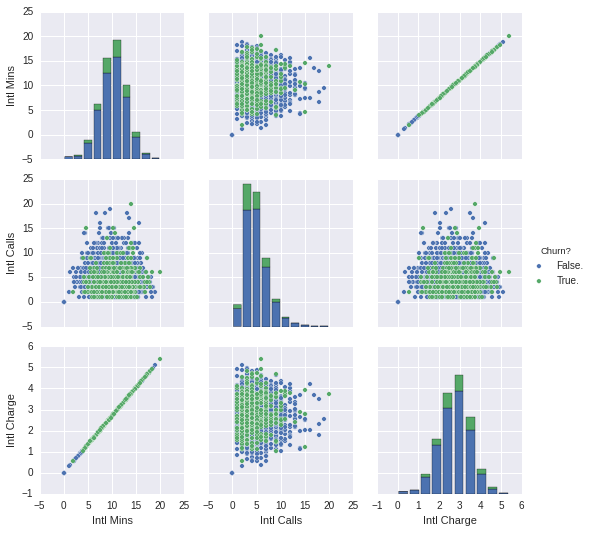

In [12]:
sns.pairplot(df[["Intl Mins", "Intl Calls","Intl Charge", "Churn?"]],hue='Churn?')
#plt.show()

In [ ]:
#Looking at this graph we can say that there is linear relationship between some variables.

Exploring the co-relation between the features by plotting the heatmap.
---

In [12]:
correlation=df[numeric_columns].corr()

In [13]:
sns.heatmap(correlation)
plt.show()

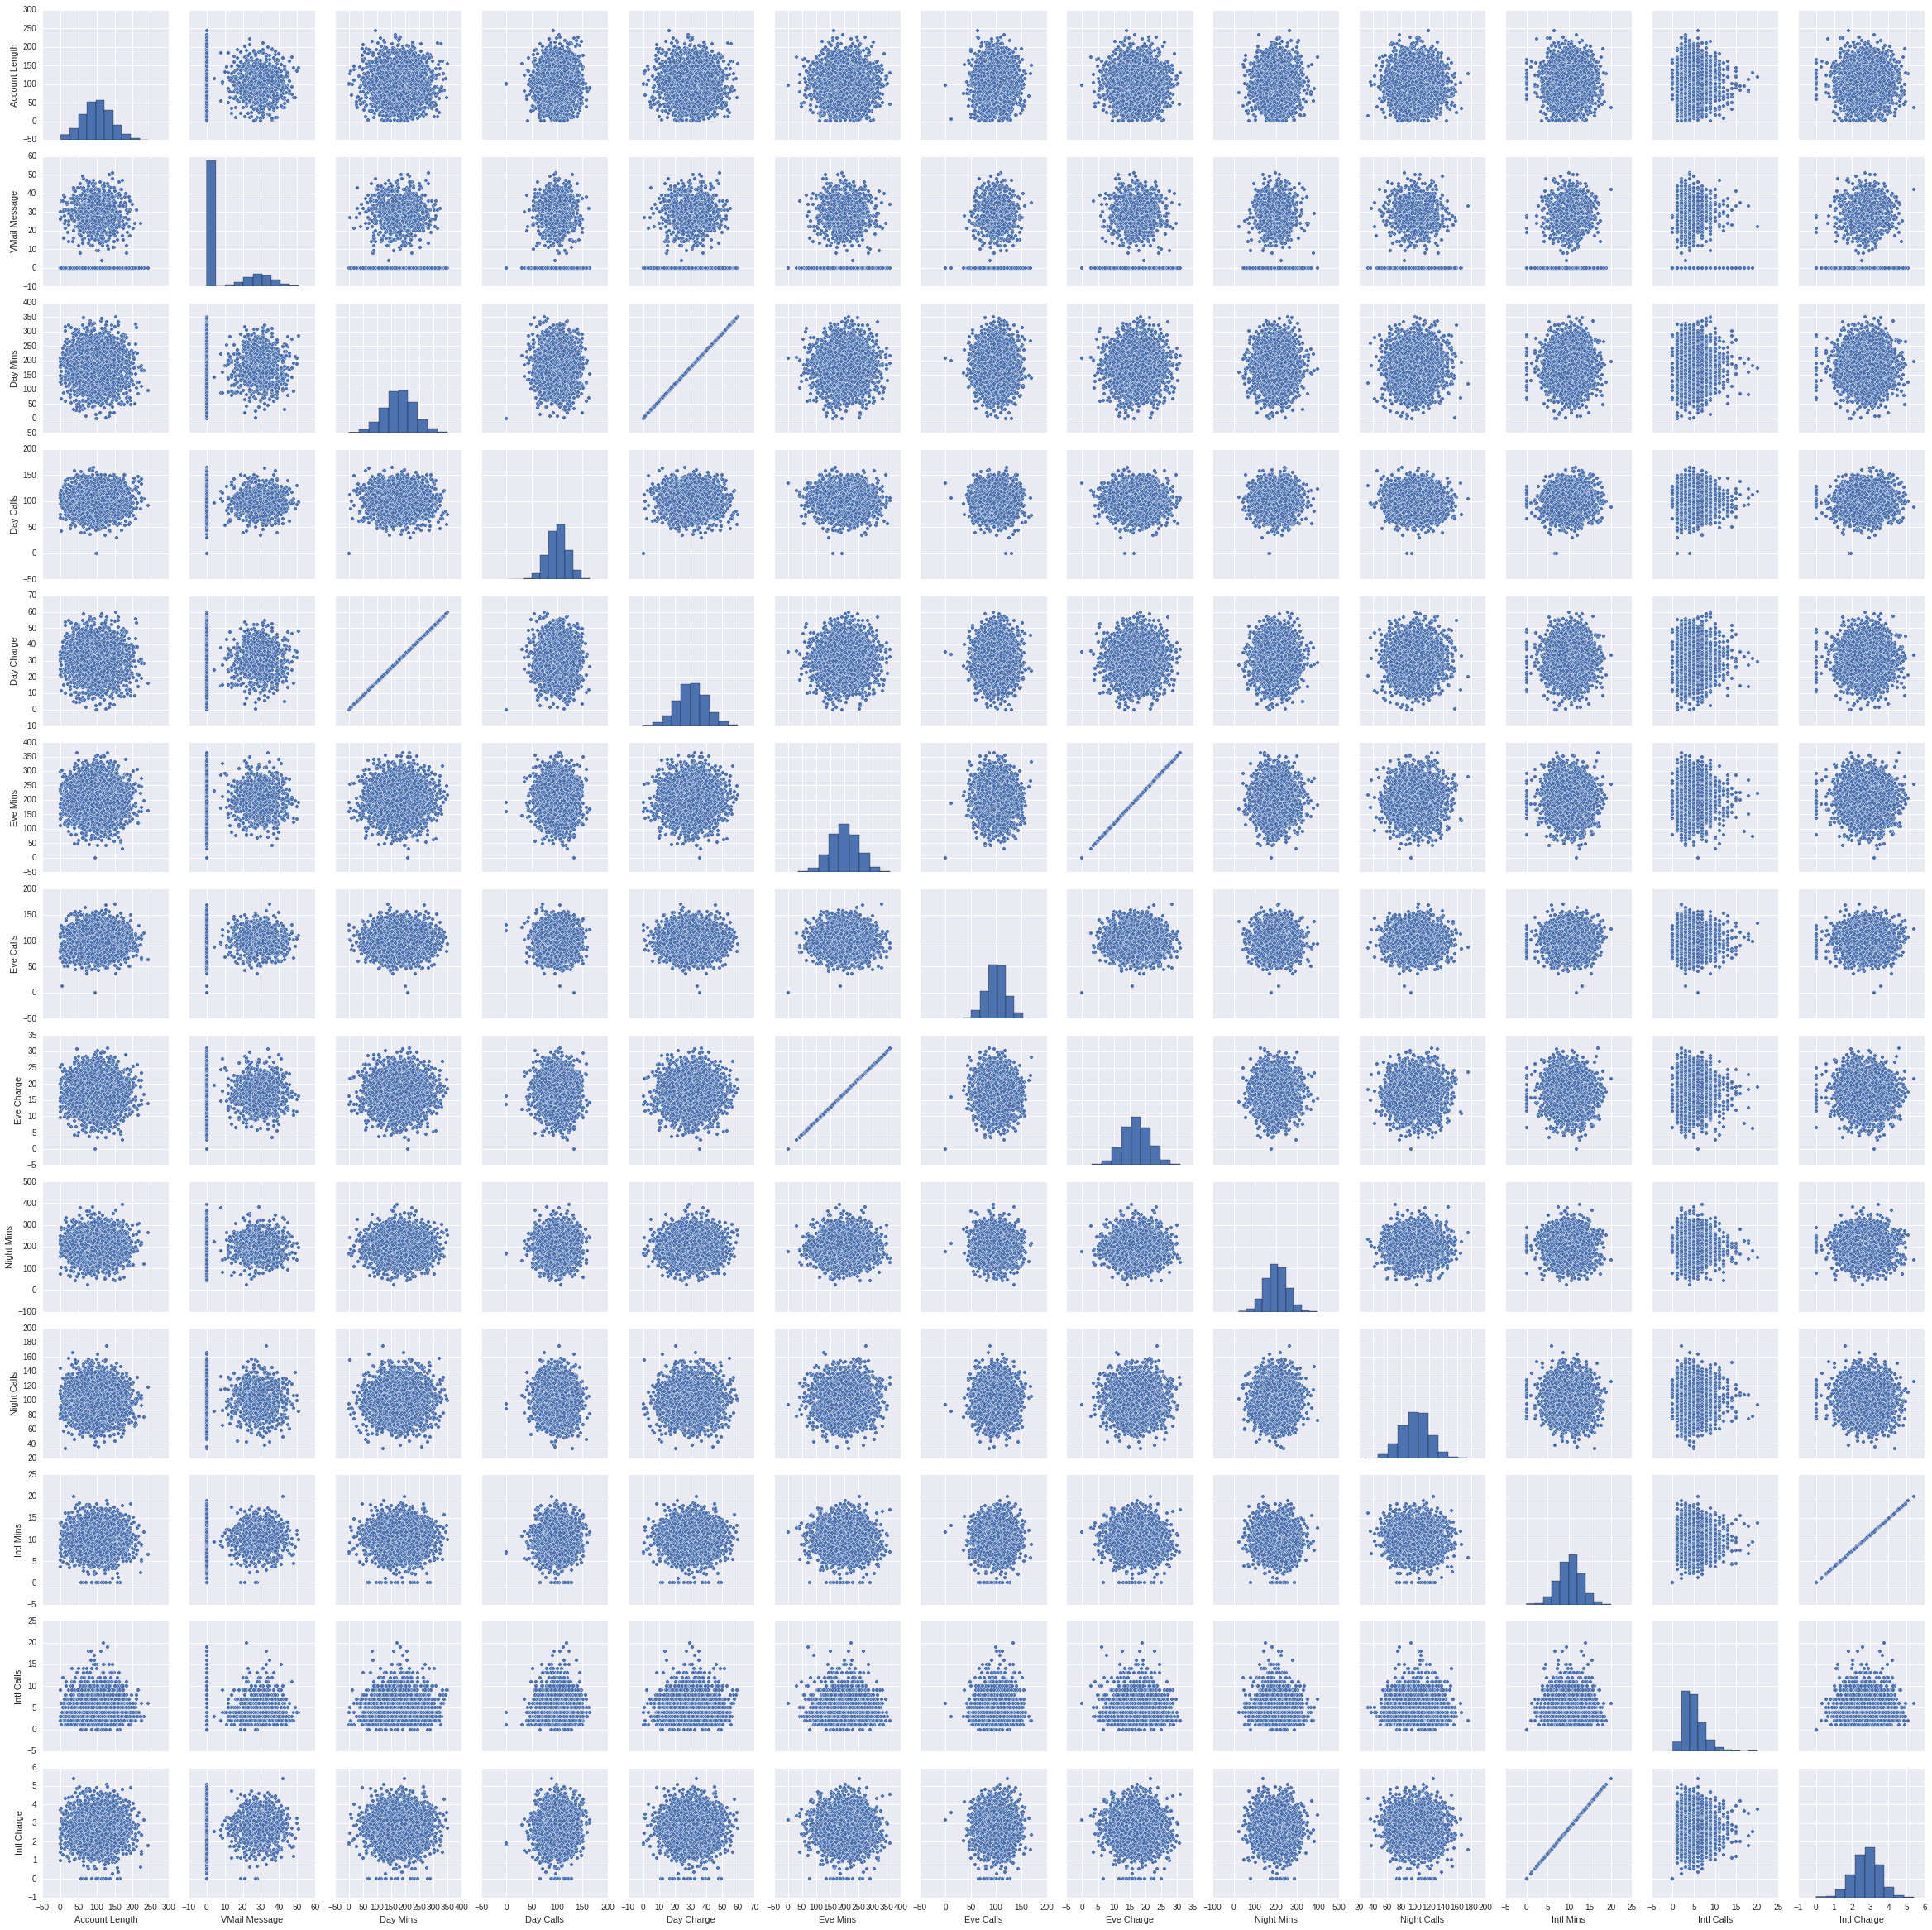

In [22]:
sns.pairplot(df[numeric_columns],palette='Paired')

In [33]:
#Labeled Data

In [24]:
churn=df['Churn?']

In [25]:
y=np.where(churn=='True.',1,0)   

In [ ]:
#Dropping the features which is not significant

In [26]:
column_to_drop=['State','Area Code','Phone','Churn?']

In [27]:
churn_df=df.drop(column_to_drop,axis=1)

In [ ]:
#Converting the categorical values into numbers

In [28]:
categ_column=["Int'l Plan","VMail Plan"]

In [29]:
churn_df[categ_column]=churn_df[categ_column]=='yes'

In [30]:
features=churn_df.columns

In [31]:
features

Index([u'Account Length', u'Int'l Plan', u'VMail Plan', u'VMail Message',
       u'Day Mins', u'Day Calls', u'Day Charge', u'Eve Mins', u'Eve Calls',
       u'Eve Charge', u'Night Mins', u'Night Calls', u'Night Charge',
       u'Intl Mins', u'Intl Calls', u'Intl Charge', u'CustServ Calls'],
      dtype='object')

Preparing the feature Matrix
---

In [35]:
X=churn_df.as_matrix().astype(np.float)

Normalising the Data
---

In [36]:
X = StandardScaler().fit_transform(X)

In [37]:
#K-Fold cross validation.

def cross_validation(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

Running 5 different models Logistic Regression,SVM,Random Forest, K nearest neighbour and Gradient Boosting
---

In [38]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC

def accuracy(y_true,y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

print "Logistic Regression:"
print "%.3f" % accuracy(y, cross_validation(X,y,LR))
print "Gradient Boosting Classifier"
print "%.3f" % accuracy(y, cross_validation(X,y,GBC))
print "Support vector machines:"
print "%.3f" % accuracy(y, cross_validation(X,y,SVC))
print "Random forest:"
print "%.3f" % accuracy(y, cross_validation(X,y,RF))
print "K-nearest-neighbors:"
print "%.3f" % accuracy(y, cross_validation(X,y,KNN))


Logistic Regression:
0.864
Gradient Boosting Classifier
0.953
Support vector machines:
0.920
Random forest:
0.942
K-nearest-neighbors:
0.894


Gradient Boosting and Random Forest gives the nearest best score.
---

Checking the Confusion Matrix as it is a better way for evaluation of model as class was imbalanced.
---

[[2822   28]
 [ 238  245]]


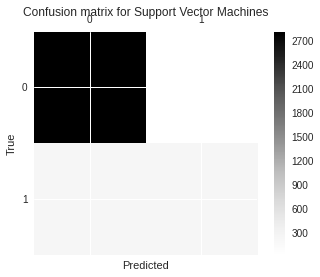

[[2824   26]
 [ 158  325]]


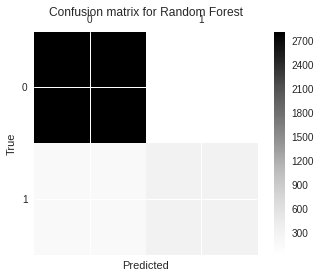

[[2807   43]
 [ 314  169]]


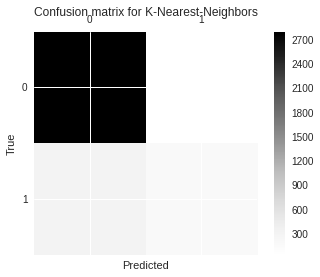

[[2812   38]
 [ 128  355]]


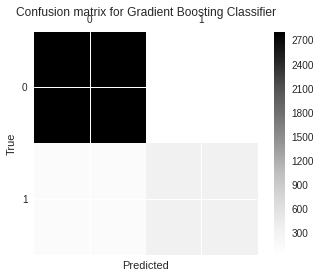

[[2765   85]
 [ 385   98]]


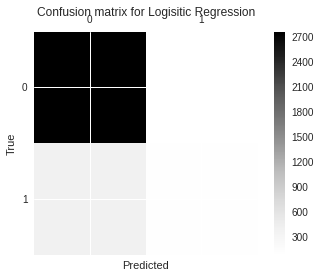

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        print(cm)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
    ( "Support Vector Machines", confusion_matrix(y,cross_validation(X,y,SVC)) ),
    ( "Random Forest", confusion_matrix(y,cross_validation(X,y,RF)) ),
    ( "K-Nearest-Neighbors", confusion_matrix(y,cross_validation(X,y,KNN)) ),
    ( "Gradient Boosting Classifier", confusion_matrix(y,cross_validation(X,y,GBC)) ),
    ( "Logisitic Regression", confusion_matrix(y,cross_validation(X,y,LR)) )
]




draw_confusion_matrices(confusion_matrices,class_names)

If we see the recall and precision rate Random Forest and Gradient Boosting performed the best.
---


Support vector machines:


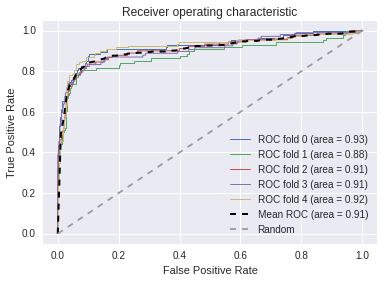

Random forests:


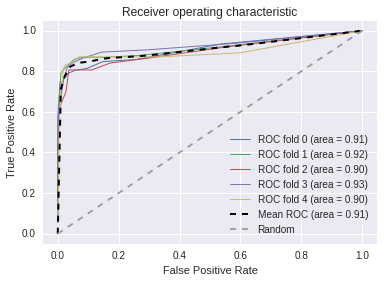

K-nearest-neighbors:


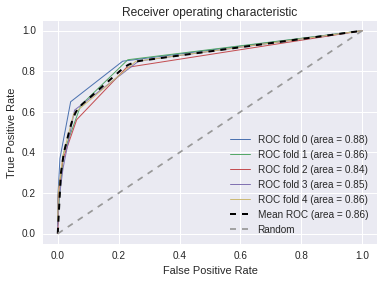

Gradient Boosting Classifier:


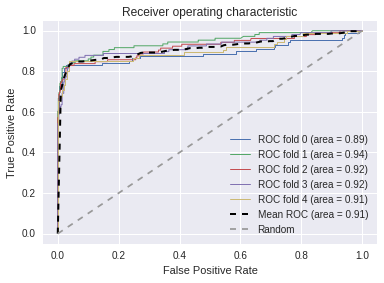

In [41]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

def plot_roc(X, y, clf_class, **kwargs):
    kf = KFold(len(y), n_folds=5, shuffle=True)
    y_prob = np.zeros((len(y),2))
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    for i, (train_index, test_index) in enumerate(kf):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y[test_index], y_prob[test_index, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    mean_tpr /= len(kf)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
      

print "Support vector machines:"
plot_roc(X,y,SVC,probability=True)

print "Random forests:"
plot_roc(X,y,RF,n_estimators=18)

print "K-nearest-neighbors:"
plot_roc(X,y,KNN)

print "Gradient Boosting Classifier:"
plot_roc(X,y,GBC)

By seeing the ROC curve we can say that Gradient Boosting and Random forest performed best.
---

Checking the features which cause customer churn
---

Feature ranking:
1. Account Length (0.152110)
2. Int'l Plan (0.125511)
3. VMail Plan (0.069473)
4. VMail Message (0.068924)
5. Day Mins (0.058933)
6. Day Calls (0.032523)
7. Day Charge (0.030113)
8. Eve Mins (0.028325)
9. Eve Calls (0.026657)
10. Eve Charge (0.021005)


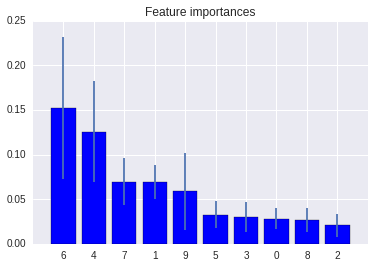

In [43]:
train_index,test_index = train_test_split(churn_df.index)

forest = RF()
forest_fit = forest.fit(X[train_index], y[train_index])
forest_predictions = forest_fit.predict(X[test_index])

importances = forest_fit.feature_importances_[:10]
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
#import pylab as pl
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices], yerr=std[indices], color="b", align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()

In [87]:
So the top 10 features which contribute to customer churn are :
    
1. Account Length (0.152110)
2. Int'l Plan (0.125511)
3. VMail Plan (0.069473)
4. VMail Message (0.068924)
5. Day Mins (0.058933)
6. Day Calls (0.032523)
7. Day Charge (0.030113)
8. Eve Mins (0.028325)
9. Eve Calls (0.026657)
10. Eve Charge (0.021005)

In [ ]:
Model is evaluated based on the confusion matrix and ROC curve and it is seen that Gradient Boosting and Random Forest
performed best to predict the churn.